In [ ]:
!pip install edgar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 17.1 MB/s eta 0:00:00


In [ ]:
!pip install edgartools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 11.8 MB/s eta 0:00:00


In [ ]:
!pip show edgar

Name: edgar
Version: 5.4.3
Summary: Scrape data from SEC's EDGAR
Home-page: https://github.com/joeyism/py-edgar
Author: Joey Sham
Author-email: sham.joey@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: lxml, rapidfuzz, requests, tqdm
Required-by: 


In [ ]:
!pip show edgartools

Name: edgartools
Version: 2.21.1
Summary: One of the nicest looking EDGAR libraries out there
Home-page: 
Author: 
Author-email: Dwight Gunning <dgunning@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: beautifulsoup4, charset-normalizer, fastcore, httpx, humanize, lxml, pandas, pyarrow, pydantic, rank-bm25, retry, rich, tabulate, textdistance
Required-by: 


In [ ]:
from edgar import Company,set_identity

In [ ]:
set_identity("Rishabh Bhati rishabhbhati478@gmail.com")

In [ ]:
from edgar import *

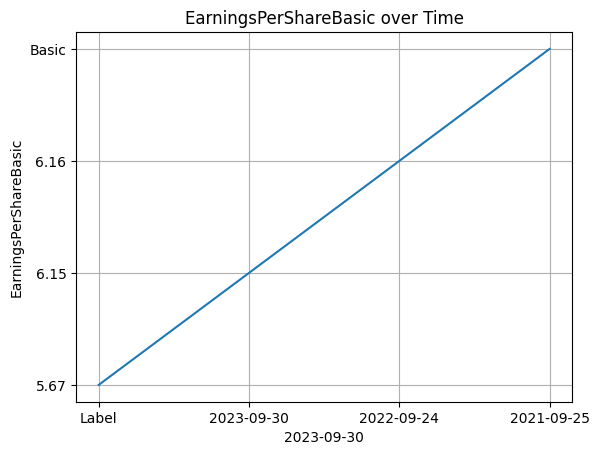

In [ ]:
import matplotlib.pyplot as plt

# Your code to retrieve financial data and create the DataFrame (df_transposed)
set_identity("First Last email@domain.com")
company = Company("320193")
tenk = Company(a).get_filings(form="10-K").latest(1).obj()
financials = tenk.financials
df = financials.income_statement.to_dataframe()
df_transposed = df.transpose()
import matplotlib.pyplot as plt

# Sort the DataFrame by the chosen column in descending order (highest to lowest EPS)
df_transposed_sorted = df_transposed.sort_values(by='EarningsPerShareBasic', ascending=False)

# Extract data for plotting (reversed order for increasing y-axis)
sorted_dates = list(df_transposed_sorted.index)  # Extract dates in sorted order
sorted_eps = list(df_transposed_sorted['EarningsPerShareBasic'])[::-1]  # Reverse EPS list

# Plot the data as a line chart
plt.plot(sorted_dates, sorted_eps)

# Customize the plot (optional)
plt.xlabel('2023-09-30')
plt.ylabel('EarningsPerShareBasic')
plt.title(f"EarningsPerShareBasic over Time")
plt.grid(True)

# Display the plot
plt.show()


## Download SEC fles as PDF

In [ ]:
!pip install -q sec-api

In [ ]:
!pip show sec-api

Name: sec-api
Version: 1.0.18
Summary: SEC EDGAR Filings API
Home-page: UNKNOWN
Author: SEC API
Author-email: support@sec-api.io
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: requests
Required-by: 


In [ ]:
API_KEY = 'c9d34e02cabb763896e6e7af36734e4d5843b11b0f3ee342ee8aa24150805a43'

In [ ]:
from sec_api import QueryApi

queryApi = QueryApi(api_key=API_KEY)

In [ ]:
import pandas as pd


def standardize_filing_url(url):
  return url.replace('ix?doc=/', '')


def get_10K_metadata(start_year = 2021, end_year = 2022):
  frames = []

  for year in range(start_year, end_year + 1):
    number_of_objects_downloaded = 0

    for month in range(1, 13):
      padded_month = str(month).zfill(2) # "1" -> "01"
      date_range_filter = f'filedAt:[{year}-{padded_month}-01 TO {year}-{padded_month}-31]'
      form_type_filter  = f'formType:"10-K" AND NOT formType:("10-K/A", NT)'
      lucene_query = date_range_filter + ' AND ' + form_type_filter

      query_from = 0
      query_size = 200

      while True:
        query = {
          "query": lucene_query,
          "from": query_from,
          "size": query_size,
          "sort": [{ "filedAt": { "order": "desc" } }]
        }

        response = queryApi.get_filings(query)
        filings = response['filings']

        if len(filings) == 0:
          break
        else:
          query_from += query_size

        metadata = list(map(lambda f: {'ticker': f['ticker'],
                                       'cik': f['cik'],
                                       'formType': f['formType'],
                                       'filedAt': f['filedAt'],
                                       'filingUrl': f['linkToFilingDetails']
                                      }, filings))

        df = pd.DataFrame.from_records(metadata)
        # remove all entries without a ticker symbol
        df = df[df['ticker'].str.len() > 0]
        df['filingUrl'] = df['filingUrl'].apply(standardize_filing_url)
        frames.append(df)
        number_of_objects_downloaded += len(df)

    print(f'✅ Downloaded {number_of_objects_downloaded} metadata objects for year {year}')

  result = pd.concat(frames)

  print(f'✅ Download completed. Metadata downloaded for {len(result)} filings.')

  return result

In [ ]:
metadata_10K = get_10K_metadata(start_year=2020, end_year=2020)

✅ Downloaded 5525 metadata objects for year 2020
✅ Download completed. Metadata downloaded for 5525 filings.


In [ ]:
metadata_10K

,ticker,cik,formType,filedAt,filingUrl
0,DOMH,12239,10-K,2020-01-31T18:42:32-05:00,https://www.sec.gov/Archives/edgar/data/12239/...
1,SCRH,831489,10-K,2020-01-31T17:25:50-05:00,https://www.sec.gov/Archives/edgar/data/831489...
2,EBAY,1065088,10-K,2020-01-31T16:53:51-05:00,https://www.sec.gov/Archives/edgar/data/106508...
3,OMN,1090061,10-K,2020-01-31T13:28:05-05:00,https://www.sec.gov/Archives/edgar/data/109006...
4,BA,12927,10-K,2020-01-31T13:23:40-05:00,https://www.sec.gov/Archives/edgar/data/12927/...
...,...,...,...,...,...
166,SRDX,924717,10-K,2020-12-02T13:10:26-05:00,https://www.sec.gov/Archives/edgar/data/924717...
167,BWMY,1656501,10-K,2020-12-01T17:30:28-05:00,https://www.sec.gov/Archives/edgar/data/165650...
168,HNNA,1145255,10-K,2020-12-01T16:16:12-05:00,https://www.sec.gov/Archives/edgar/data/114525...
169,COHR,21510,10-K,2020-12-01T16:10:17-05:00,https://www.sec.gov/Archives/edgar/data/21510/...


In [ ]:
metadata_10K.to_csv('metadata_10K.csv', index=False)

In [ ]:
metadata_10K[metadata_10K['ticker'] == 'AAPL']

,ticker,cik,formType,filedAt,filingUrl
4,AAPL,320193,10-K,2020-10-29T18:06:25-04:00,https://www.sec.gov/Archives/edgar/data/320193...


In [ ]:
import os

def download_filing(metadata):
  ticker = metadata['ticker']
  url = metadata['filingUrl']

  try:
    new_folder = './filings/' + ticker
    date = metadata['filedAt'][:10]
    file_name = date + '_' + metadata['formType'] + '_' + url.split('/')[-1]

    if not os.path.isdir(new_folder):
      os.makedirs(new_folder)

    file_content = renderApi.get_filing(url)

    with open(new_folder + "/" + file_name, "w") as f:
      f.write(file_content)
  except:
     print(f"❌ {ticker}: downloaded failed: {url}")

In [ ]:
download_filing(metadata_10K.iloc[0])
print('✅ Sample 10-K filing downloaded for {}'.format(metadata_10K.iloc[0]['ticker']))

❌ DOMH: downloaded failed: https://www.sec.gov/Archives/edgar/data/12239/000121390020002309/f10k2019_spherixincorp.htm
✅ Sample 10-K filing downloaded for DOMH


In [ ]:
!pip install -q pandarallel

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.8 MB/s eta 0:00:00


In [ ]:
from pandarallel import pandarallel

number_of_workers = 4
pandarallel.initialize(progress_bar=True, nb_workers=number_of_workers, verbose=0)

In [ ]:
import requests

PDF_GENERATOR_API = 'https://api.sec-api.io/filing-reader'

def download_pdf(metadata):
  ticker = metadata['ticker']
  filing_url = metadata['filingUrl']

  try:
    new_folder = './filings/' + ticker
    date = metadata['filedAt'][:10]
    file_name = date + '_' + metadata['formType'] + '_' + filing_url.split('/')[-1] + '.pdf'

    if not os.path.isdir(new_folder):
      os.makedirs(new_folder)

    api_url = f"{PDF_GENERATOR_API}?token={API_KEY}&type=pdf&url={filing_url}"
    response = requests.get(api_url, stream=True)
    response.raise_for_status()

    with open(new_folder + "/" + file_name, "wb") as file:
      for chunk in response.iter_content(chunk_size=8192):
          file.write(chunk)
  except:
     print(f"❌ {ticker}: downloaded failed: {filing_url}")

In [ ]:
sample2 = metadata_10K.sort_values('ticker').head(10)
sample2.parallel_apply(download_pdf, axis=1)

# download all filings as PDFs
# metadata_10K.parallel_apply(download_pdf, axis=1)

print('✅ Download completed')

✅ Download completed


### Method 2


In [ ]:
!pip install langchain
!pip install openai
!pip install PyPDF2
!pip install faiss-cpu
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 20.5 MB/s eta 0:00:00


In [ ]:
from PyPDF2 import PdfReader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import ElasticVectorSearch, Pinecone, Weaviate, FAISS

In [ ]:
# location of the pdf file/files.
reader = PdfReader('/content/filings/1314152/2020-03-10_10-K_jllipt-20191231x10k.htm.pdf')

In [ ]:
reader

In [ ]:
# read data from the file and put them into a variable called raw_text
raw_text = ''
for i, page in enumerate(reader.pages):
    text = page.extract_text()
    if text:
        raw_text += text

In [ ]:
# raw_text

In [ ]:
raw_text[:100]

'10-K 1 jllipt-20191231x10k.htm 10-K\nTable of Contents\nUNITED ST ATES\nSECURITIES AND EXCHANGE COMMISS'

In [ ]:
# We need to split the text that we read into smaller chunks so that during information retreival we don't hit the token size limits.

text_splitter = CharacterTextSplitter(
    separator = "\n",
    chunk_size = 1000,
    chunk_overlap  = 200,
    length_function = len,
)
texts = text_splitter.split_text(raw_text)

In [ ]:
len(texts)

525

In [ ]:
# Download embeddings from OpenAI
embeddings = OpenAIEmbeddings()

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [ ]:
docsearch

In [ ]:
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI

In [ ]:
chain = load_qa_chain(OpenAI(), chain_type="stuff")

In [ ]:
query = "who are the important insights in 50 words?"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

' The authors of the article are Yuvanesh Anand, Zach Nussbaum, Brandon Duderstadt, Benjamin Schmidt and Andriy Mulyar.'